In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile, rarfile
from datetime import datetime
import os
from tqdm import tqdm_notebook as tqdm
import geopandas as gpd
from shapely.geometry import *
from shapely.ops import *

In [24]:
!conda install -n geo_env -c conda-forge widgetsnbextension
!conda install -n geo_env -c conda-forge ipywidgets

^C
^C


In [7]:
path_all = r'C:\Users\IMP\Documents\ЦЭИ\Приложение 1.2\Август 2020\ALL'

In [22]:
dict_path_all = [{x.split('_')[0] : {x:x.split('_')[2].split('.')[0]}} if len(x) == 19 else {x.split('_')[0] : {x:""}} for x in os.listdir(path_all)]
dict_path_all

[{'2020-08-01': {'2020-08-01_s2.csv': ''}},
 {'2020-08-01': {'2020-08-01_s2_2.csv': '2'}},
 {'2020-08-01': {'2020-08-01_s2_3.csv': '3'}},
 {'2020-08-01': {'2020-08-01_s2_4.csv': '4'}},
 {'2020-08-01': {'2020-08-01_s3.csv': ''}},
 {'2020-08-01': {'2020-08-01_s3_2.csv': '2'}},
 {'2020-08-01': {'2020-08-01_s3_3.csv': '3'}},
 {'2020-08-01': {'2020-08-01_s3_4.csv': '4'}},
 {'2020-08-01': {'2020-08-01_s5.csv': ''}},
 {'2020-08-01': {'2020-08-01_s5_2.csv': '2'}},
 {'2020-08-01': {'2020-08-01_s5_3.csv': '3'}},
 {'2020-08-01': {'2020-08-01_s5_4.csv': '4'}},
 {'2020-08-01': {'2020-08-01_s6.csv': ''}},
 {'2020-08-01': {'2020-08-01_s6_2.csv': '2'}},
 {'2020-08-01': {'2020-08-01_s6_3.csv': '3'}},
 {'2020-08-01': {'2020-08-01_s6_4.csv': '4'}},
 {'2020-08-01': {'2020-08-01_s7.csv': ''}},
 {'2020-08-01': {'2020-08-01_s7_2.csv': '2'}},
 {'2020-08-01': {'2020-08-01_s7_3.csv': '3'}},
 {'2020-08-01': {'2020-08-01_s7_4.csv': '4'}},
 {'2020-08-02': {'2020-08-02_s2.csv': ''}},
 {'2020-08-02': {'2020-08-02_s2

In [44]:
list(list(dict_path_all[0].values())[0].keys())[0]

'2020-08-01_s2.csv'

In [46]:

for i in tqdm(dict_path_all):
    folder_path = list(i.keys())[0]
    if not os.path.exists(path_main + "/" + folder_path): os.mkdir(path_main + "/" + folder_path)
    folder1_path = path_main + "/" + folder_path + "/" + 'df_{}'.format(list(list(i.values())[0].values())[0])
    if not os.path.exists(folder1_path): os.mkdir(folder1_path)
    pd.read_csv(path_all + "/" + list(list(i.values())[0].keys())[0], sep = '\t', encoding = 'cp1251')\
    .to_csv(folder1_path + "/" + list(list(i.values())[0].keys())[0], sep = '\t', encoding = 'cp1251', index=False)

<ipython-input-46-3cf823648dd9>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(dict_path_all):


C:\Users\IMP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df_4 = pd.DataFrame()
path_df = r'C:\Users\IMP\Documents\ЦЭИ\Приложение 1.2\Август 2020\2020-08-03\df_4'
list_fol = os.listdir(path_df)
for k in tqdm(list_fol):
            
    df_4 = df_4.append(pd.read_csv(path_df + "/" + k, sep = '\t', encoding = 'cp1251'), ignore_index=True)
df_4

<ipython-input-2-27fecc154257>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm(list_fol):


C:\Users\IMP\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,tr_id,mr_id,mr_name,graph,tabelnum,condnum,timenav,long,lat,speed,mark
0,0,200000005,105,48д,16,0,0,2020-08-03 08:08:35,50.105748,53.183607,0,0
1,1,200000005,105,48д,16,0,0,2020-08-03 08:09:08,50.107532,53.185437,0,0
2,2,200000005,105,48д,16,0,0,2020-08-03 08:09:35,50.109833,53.187788,0,0
3,3,200000005,105,48д,16,0,0,2020-08-03 08:10:07,50.111470,53.188135,0,0
4,4,200000005,105,48д,16,0,0,2020-08-03 08:10:36,50.114563,53.187878,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3684905,239353,704953073,119,17,927,536,0,2020-08-03 19:22:47,50.120402,53.196095,5,0
3684906,239354,704953073,119,17,927,536,0,2020-08-03 19:23:03,50.120943,53.196503,11,0
3684907,239355,704953073,119,17,927,536,0,2020-08-03 19:23:18,50.121825,53.196947,11,0
3684908,239356,704953073,119,17,927,536,0,2020-08-03 19:23:33,50.121995,53.196947,3,0


In [56]:
df_4['mr_id'].nunique()

131

In [57]:
df_4[['mr_id']].drop_duplicates().to_csv('mr_id.csv', sep = '\t', encoding = 'cp1251', index=False)

In [61]:
Samara_mr_id_marsh_valid_id = pd.read_csv('Samara_mr_id_marsh_valid_id (1).csv', sep = ';', encoding = 'cp1251')
Samara_mr_id_marsh_valid_id

,mr_id,val_id_marsh1,val_id_marsh2,val_id_marsh3
0,39,115703456789,1.360346e+10,1.360346e+10
1,70,10703456789,1.128035e+11,1.128030e+11
2,60,141203456789,1.404035e+11,1.404030e+11
3,34,141503456789,1.407035e+11,1.407030e+11
4,38,141603456789,1.408035e+11,1.408030e+11
...,...,...,...,...
75,306,134103456789,NaN,NaN
76,27,140203456789,NaN,NaN
77,199,140303456789,NaN,NaN
78,61,140503456789,NaN,NaN


## script

In [16]:
df_4_small = df_4.query('tr_id == 500000305').reset_index(drop=True)

list_1 = list(df_4_small['lat'][1:])
list_1.append(df_4_small['lat'][1])
df_4_small['rd_lat_to'] = list_1

list_2 = list(df_4_small['long'][1:])
list_2.append(df_4_small['long'][1])
df_4_small['rd_long_to'] = list_2
df_4_small = gpd.GeoDataFrame(df_4_small, geometry = [LineString(xy) for xy in 
                                                                zip([Point(xy) for xy in zip(df_4_small['long'], df_4_small['lat'])], 
                                                                   [Point(xy) for xy in zip(df_4_small['rd_long_to'], df_4_small['rd_lat_to'])])])
df_4_small


,Unnamed: 0,tr_id,mr_id,mr_name,graph,tabelnum,condnum,timenav,long,lat,speed,mark,rd_lat_to,rd_long_to,geometry
0,501141,500000305,20,22,2,1219,0,2020-08-03 05:39:06,50.222733,53.201685,27,0,53.201632,50.221573,"LINESTRING (50.22273 53.20168, 50.22157 53.20163)"
1,501142,500000305,20,22,2,1219,0,2020-08-03 05:39:15,50.221573,53.201632,24,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)"
2,501143,500000305,20,22,2,1219,0,2020-08-03 05:39:26,50.221573,53.201632,0,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)"
3,501144,500000305,20,22,2,1219,0,2020-08-03 05:39:36,50.221573,53.201632,0,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)"
4,501145,500000305,20,22,2,1219,0,2020-08-03 05:39:46,50.221573,53.201632,0,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693,506834,500000305,20,22,2,1219,0,2020-08-03 19:06:31,50.264920,53.239552,9,0,53.239588,50.264843,"LINESTRING (50.26492 53.23955, 50.26484 53.23959)"
5694,506835,500000305,20,22,2,1219,0,2020-08-03 19:06:33,50.264843,53.239588,12,0,53.239595,50.264735,"LINESTRING (50.26484 53.23959, 50.26474 53.23960)"
5695,506836,500000305,20,22,2,1219,0,2020-08-03 19:06:36,50.264735,53.239595,13,0,53.239367,50.263767,"LINESTRING (50.26474 53.23960, 50.26377 53.23937)"
5696,506837,500000305,20,22,2,1219,0,2020-08-03 19:06:47,50.263767,53.239367,23,0,53.239360,50.263660,"LINESTRING (50.26377 53.23937, 50.26366 53.23936)"


In [17]:
df_4_small.to_csv('tr_id_500000305.csv', sep = ';', encoding = 'cp1251', index=False)

In [5]:
stop_seq = pd.read_csv('stop_seq_v3.csv', sep = ';', encoding = 'cp1251')
stop_seq

,mr_id,rc_id,rl_id,ssId,rc_orderby,ss_lat,ss_long,is_main,Dir
0,20,136519,1365,552,19,53.187009,50.118634,NaN,1
1,20,136518,1365,553,18,53.187367,50.118558,NaN,1
2,20,136517,1365,38,17,53.192697,50.122152,NaN,1
3,20,136516,1365,37,16,53.194078,50.123089,NaN,1
4,20,136515,1365,44,15,53.199276,50.130360,NaN,1
...,...,...,...,...,...,...,...,...,...
13019,17,7596605,75966,351,5,53.197004,50.108299,NaN,0
13020,17,7596604,75966,350,4,53.191903,50.104823,NaN,0
13021,17,7596603,75966,349,3,53.189191,50.102945,NaN,0
13022,17,7596602,75966,1159,2,53.186512,50.098602,NaN,0


In [6]:
stop_seq_short = stop_seq.query('mr_id == 20')[['mr_id', 'rc_id', 'rc_orderby', 'ssId', 'ss_lat', 'ss_long']]\
.sort_values(['mr_id', 'rc_id', 'rc_orderby'])\
.drop_duplicates().reset_index(drop=True)
stop_seq_short

,mr_id,rc_id,rc_orderby,ssId,ss_lat,ss_long
0,20,136501,1,615,53.191015,50.190479
1,20,136502,2,268,53.192244,50.191035
2,20,136503,3,269,53.194031,50.190885
3,20,136504,4,270,53.202340,50.190149
4,20,136505,5,271,53.205964,50.189849
5,20,136506,6,272,53.210367,50.189512
6,20,136507,7,273,53.213164,50.189372
7,20,136508,8,274,53.215060,50.187768
8,20,136509,9,31,53.213004,50.180558
9,20,136510,10,32,53.209721,50.175016


In [7]:
stop_seq_short.to_csv('mr_id_20.csv', sep = ';', encoding = 'cp1251', index=False)

In [8]:
all_trace = pd.read_csv(r'C:\Users\IMP\Documents\ЦЭИ\Приложение 1\Таблица 8. Реестр участков маршрутной сети с привязкой к маршрутам.csv', sep = '\t', encoding = 'cp1251')
all_trace

,mv_id,rl_id,rd_orderby,rd_lat,rd_long
0,13,1365,1,53.190950,50.190492
1,13,1365,2,53.190964,50.190988
2,13,1365,3,53.190966,50.191096
3,13,1365,4,53.191667,50.191031
4,13,1365,5,53.191805,50.190975
...,...,...,...,...,...
178740,765,76566,279,53.242815,50.189989
178741,765,76566,280,53.242719,50.189881
178742,765,76566,281,53.242564,50.189753
178743,765,76566,282,53.241280,50.188905


In [13]:
all_trace_short = all_trace.query('mv_id == 13')\
.drop_duplicates()\
.sort_values(['mv_id', 'rl_id', 'rd_orderby'])\
.reset_index(drop=True)
list_1 = list(all_trace_short['rd_lat'][1:])
list_1.append(all_trace_short['rd_lat'][1])
all_trace_short['rd_lat_to'] = list_1

list_2 = list(all_trace_short['rd_long'][1:])
list_2.append(all_trace_short['rd_long'][1])
all_trace_short['rd_long_to'] = list_2
all_trace_short = gpd.GeoDataFrame(all_trace_short, geometry = [LineString(xy) for xy in 
                                                                zip([Point(xy) for xy in zip(all_trace_short['rd_long'], all_trace_short['rd_lat'])], 
                                                                   [Point(xy) for xy in zip(all_trace_short['rd_long_to'], all_trace_short['rd_lat_to'])])])
all_trace_short

,mv_id,rl_id,rd_orderby,rd_lat,rd_long,rd_lat_to,rd_long_to,geometry
0,13,1365,1,53.190950,50.190492,53.190964,50.190988,"LINESTRING (50.19049 53.19095, 50.19099 53.19096)"
1,13,1365,2,53.190964,50.190988,53.190966,50.191096,"LINESTRING (50.19099 53.19096, 50.19110 53.19097)"
2,13,1365,3,53.190966,50.191096,53.191667,50.191031,"LINESTRING (50.19110 53.19097, 50.19103 53.19167)"
3,13,1365,4,53.191667,50.191031,53.191805,50.190975,"LINESTRING (50.19103 53.19167, 50.19098 53.19181)"
4,13,1365,5,53.191805,50.190975,53.192759,50.190836,"LINESTRING (50.19098 53.19181, 50.19084 53.19276)"
...,...,...,...,...,...,...,...,...
223,13,1366,99,53.191805,50.190975,53.191666,50.190947,"LINESTRING (50.19098 53.19181, 50.19095 53.19167)"
224,13,1366,100,53.191666,50.190947,53.191603,50.190935,"LINESTRING (50.19095 53.19167, 50.19093 53.19160)"
225,13,1366,101,53.191603,50.190935,53.190964,50.190988,"LINESTRING (50.19093 53.19160, 50.19099 53.19096)"
226,13,1366,102,53.190964,50.190988,53.190950,50.190492,"LINESTRING (50.19099 53.19096, 50.19049 53.19095)"


In [14]:
all_trace_short.to_csv('mv_id_13.csv', sep = ';', encoding = 'cp1251', index=False)

In [20]:
all_trace_short_1 = all_trace_short.copy()
all_trace_short_1.crs = {"init": "EPSG:4326"}
all_trace_short_1 = all_trace_short_1.to_crs({"init": "EPSG:32640"})                                              
# all_trace_short_1['rd_lat_crs'] = all_trace_short_1.geometry.x
# all_trace_short_1['rd_long_crs'] = all_trace_short_1.geometry.y
all_trace_short_1['new_geo'] = all_trace_short_1.geometry.buffer(50)
all_trace_short_1

,mv_id,rl_id,rd_orderby,rd_lat,rd_long,rd_lat_to,rd_long_to,geometry,new_geo
0,13,1365,1,53.190950,50.190492,53.190964,50.190988,"LINESTRING (45333.639 5915188.201, 45366.860 5...","POLYGON ((45369.277 5915236.535, 45374.161 591..."
1,13,1365,2,53.190964,50.190988,53.190966,50.191096,"LINESTRING (45366.860 5915186.593, 45374.083 5...","POLYGON ((45377.305 5915236.023, 45382.180 591..."
2,13,1365,3,53.190966,50.191096,53.191667,50.191031,"LINESTRING (45374.083 5915186.127, 45377.189 5...","POLYGON ((45327.228 5915266.350, 45327.663 591..."
3,13,1365,4,53.191667,50.191031,53.191805,50.190975,"LINESTRING (45377.189 5915264.367, 45374.920 5...","POLYGON ((45325.435 5915272.883, 45324.972 591..."
4,13,1365,5,53.191805,50.190975,53.192759,50.190836,"LINESTRING (45374.920 5915280.045, 45375.777 5...","POLYGON ((45325.779 5915387.247, 45326.059 591..."
...,...,...,...,...,...,...,...,...,...
223,13,1366,99,53.191805,50.190975,53.191666,50.190947,"LINESTRING (45374.920 5915280.045, 45371.577 5...","POLYGON ((45420.419 5915254.090, 45419.134 591..."
224,13,1366,100,53.191666,50.190947,53.191603,50.190935,"LINESTRING (45371.577 5915264.792, 45370.109 5...","POLYGON ((45419.018 5915247.489, 45417.765 591..."
225,13,1366,101,53.191603,50.190935,53.190964,50.190988,"LINESTRING (45370.109 5915257.874, 45366.860 5...","POLYGON ((45416.809 5915184.317, 45416.345 591..."
226,13,1366,102,53.190964,50.190988,53.190950,50.190492,"LINESTRING (45366.860 5915186.593, 45333.639 5...","POLYGON ((45331.222 5915138.259, 45326.339 591..."


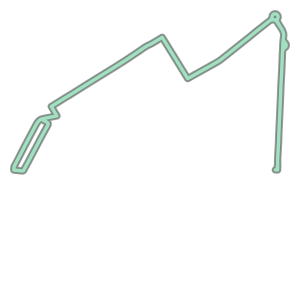

In [23]:
all_trace_short_1.new_geo.unary_union

In [24]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 * 1000 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [26]:
stop_seq_short

,mr_id,rc_id,rc_orderby,ssId,ss_lat,ss_long
0,20,136501,1,615,53.191015,50.190479
1,20,136502,2,268,53.192244,50.191035
2,20,136503,3,269,53.194031,50.190885
3,20,136504,4,270,53.202340,50.190149
4,20,136505,5,271,53.205964,50.189849
5,20,136506,6,272,53.210367,50.189512
6,20,136507,7,273,53.213164,50.189372
7,20,136508,8,274,53.215060,50.187768
8,20,136509,9,31,53.213004,50.180558
9,20,136510,10,32,53.209721,50.175016


In [25]:
df_4_small

,Unnamed: 0,tr_id,mr_id,mr_name,graph,tabelnum,condnum,timenav,long,lat,speed,mark,rd_lat_to,rd_long_to,geometry
0,501141,500000305,20,22,2,1219,0,2020-08-03 05:39:06,50.222733,53.201685,27,0,53.201632,50.221573,"LINESTRING (50.22273 53.20168, 50.22157 53.20163)"
1,501142,500000305,20,22,2,1219,0,2020-08-03 05:39:15,50.221573,53.201632,24,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)"
2,501143,500000305,20,22,2,1219,0,2020-08-03 05:39:26,50.221573,53.201632,0,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)"
3,501144,500000305,20,22,2,1219,0,2020-08-03 05:39:36,50.221573,53.201632,0,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)"
4,501145,500000305,20,22,2,1219,0,2020-08-03 05:39:46,50.221573,53.201632,0,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693,506834,500000305,20,22,2,1219,0,2020-08-03 19:06:31,50.264920,53.239552,9,0,53.239588,50.264843,"LINESTRING (50.26492 53.23955, 50.26484 53.23959)"
5694,506835,500000305,20,22,2,1219,0,2020-08-03 19:06:33,50.264843,53.239588,12,0,53.239595,50.264735,"LINESTRING (50.26484 53.23959, 50.26474 53.23960)"
5695,506836,500000305,20,22,2,1219,0,2020-08-03 19:06:36,50.264735,53.239595,13,0,53.239367,50.263767,"LINESTRING (50.26474 53.23960, 50.26377 53.23937)"
5696,506837,500000305,20,22,2,1219,0,2020-08-03 19:06:47,50.263767,53.239367,23,0,53.239360,50.263660,"LINESTRING (50.26377 53.23937, 50.26366 53.23936)"


In [31]:
stop_seq_short['key'] = 0
df_4_small['key'] = 0

df_cartesian = stop_seq_short.merge(df_4_small, how='outer')
df_cartesian

,mr_id,rc_id,rc_orderby,ssId,ss_lat,ss_long,key,Unnamed: 0,tr_id,mr_name,...,tabelnum,condnum,timenav,long,lat,speed,mark,rd_lat_to,rd_long_to,geometry
0,20,136501,1,615,53.191015,50.190479,0,501141,500000305,22,...,1219,0,2020-08-03 05:39:06,50.222733,53.201685,27,0,53.201632,50.221573,"LINESTRING (50.22273 53.20168, 50.22157 53.20163)"
1,20,136501,1,615,53.191015,50.190479,0,501142,500000305,22,...,1219,0,2020-08-03 05:39:15,50.221573,53.201632,24,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)"
2,20,136501,1,615,53.191015,50.190479,0,501143,500000305,22,...,1219,0,2020-08-03 05:39:26,50.221573,53.201632,0,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)"
3,20,136501,1,615,53.191015,50.190479,0,501144,500000305,22,...,1219,0,2020-08-03 05:39:36,50.221573,53.201632,0,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)"
4,20,136501,1,615,53.191015,50.190479,0,501145,500000305,22,...,1219,0,2020-08-03 05:39:46,50.221573,53.201632,0,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216519,20,136619,19,615,53.191015,50.190479,0,506834,500000305,22,...,1219,0,2020-08-03 19:06:31,50.264920,53.239552,9,0,53.239588,50.264843,"LINESTRING (50.26492 53.23955, 50.26484 53.23959)"
216520,20,136619,19,615,53.191015,50.190479,0,506835,500000305,22,...,1219,0,2020-08-03 19:06:33,50.264843,53.239588,12,0,53.239595,50.264735,"LINESTRING (50.26484 53.23959, 50.26474 53.23960)"
216521,20,136619,19,615,53.191015,50.190479,0,506836,500000305,22,...,1219,0,2020-08-03 19:06:36,50.264735,53.239595,13,0,53.239367,50.263767,"LINESTRING (50.26474 53.23960, 50.26377 53.23937)"
216522,20,136619,19,615,53.191015,50.190479,0,506837,500000305,22,...,1219,0,2020-08-03 19:06:47,50.263767,53.239367,23,0,53.239360,50.263660,"LINESTRING (50.26377 53.23937, 50.26366 53.23936)"


In [34]:
from tqdm import tqdm
tqdm.pandas()
# df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)
df_cartesian['len'] = df_cartesian.progress_apply(lambda x: haversine(x.long, x.lat, x.ss_long, x.ss_lat), axis = 1)
df_cartesian

100%|██████████| 216524/216524 [00:13<00:00, 15598.73it/s]


,mr_id,rc_id,rc_orderby,ssId,ss_lat,ss_long,key,Unnamed: 0,tr_id,mr_name,...,condnum,timenav,long,lat,speed,mark,rd_lat_to,rd_long_to,geometry,len
0,20,136501,1,615,53.191015,50.190479,0,501141,500000305,22,...,0,2020-08-03 05:39:06,50.222733,53.201685,27,0,53.201632,50.221573,"LINESTRING (50.22273 53.20168, 50.22157 53.20163)",2454.386948
1,20,136501,1,615,53.191015,50.190479,0,501142,500000305,22,...,0,2020-08-03 05:39:15,50.221573,53.201632,24,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)",2384.112452
2,20,136501,1,615,53.191015,50.190479,0,501143,500000305,22,...,0,2020-08-03 05:39:26,50.221573,53.201632,0,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)",2384.112452
3,20,136501,1,615,53.191015,50.190479,0,501144,500000305,22,...,0,2020-08-03 05:39:36,50.221573,53.201632,0,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)",2384.112452
4,20,136501,1,615,53.191015,50.190479,0,501145,500000305,22,...,0,2020-08-03 05:39:46,50.221573,53.201632,0,0,53.201632,50.221573,"LINESTRING (50.22157 53.20163, 50.22157 53.20163)",2384.112452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216519,20,136619,19,615,53.191015,50.190479,0,506834,500000305,22,...,0,2020-08-03 19:06:31,50.264920,53.239552,9,0,53.239588,50.264843,"LINESTRING (50.26492 53.23955, 50.26484 53.23959)",7327.788237
216520,20,136619,19,615,53.191015,50.190479,0,506835,500000305,22,...,0,2020-08-03 19:06:33,50.264843,53.239588,12,0,53.239595,50.264735,"LINESTRING (50.26484 53.23959, 50.26474 53.23960)",7327.270015
216521,20,136619,19,615,53.191015,50.190479,0,506836,500000305,22,...,0,2020-08-03 19:06:36,50.264735,53.239595,13,0,53.239367,50.263767,"LINESTRING (50.26474 53.23960, 50.26377 53.23937)",7322.986306
216522,20,136619,19,615,53.191015,50.190479,0,506837,500000305,22,...,0,2020-08-03 19:06:47,50.263767,53.239367,23,0,53.239360,50.263660,"LINESTRING (50.26377 53.23937, 50.26366 53.23936)",7260.839688
